In [1]:
import tensorflow as tf
import numpy as np
from skimage import io
from skimage.transform import resize
from skimage.color import rgb2lab, lab2rgb, rgb2gray
import matplotlib.pyplot as plt

In [2]:
model = tf.keras.models.load_model("color_model")

In [4]:
def MakePlot(original_img):
    target_size = 256
    
    # Visualizing original, input and output images
    fig, axs = plt.subplots(1, 3, figsize = (15, 5))

    # Plot original image
    axs[0].imshow(original_img)
    axs[0].set(xlabel = "Original Image", xticks = [], yticks = [])

    # Plot gray image (input)
    img = original_img/255.
    img = resize(img, (target_size, target_size, 3))
    img = rgb2lab(img)
    gray_img = img[:, :, 0]
    axs[1].imshow(gray_img, cmap = plt.cm.gray)
    axs[1].set(xlabel = "Gray Image (input)", xticks = [], yticks = [])

    # Make prediction on the input to get output
    gray_img = gray_img.reshape(1, target_size, target_size, -1)
    pred = model.predict(gray_img)
    pred = pred.reshape(target_size, target_size, 2)
    gray_img = gray_img.reshape(target_size, target_size, 1)

    # Plot colorized image (output)
    result = np.zeros((target_size, target_size, 3))
    result[:, :, 0] = gray_img[:, :, 0]
    result[:, :, 1:] = pred*128
    result = lab2rgb(result)
    axs[2].imshow(result)
    axs[2].set(xlabel = "Colorized Image (output)", xticks = [], yticks = [])

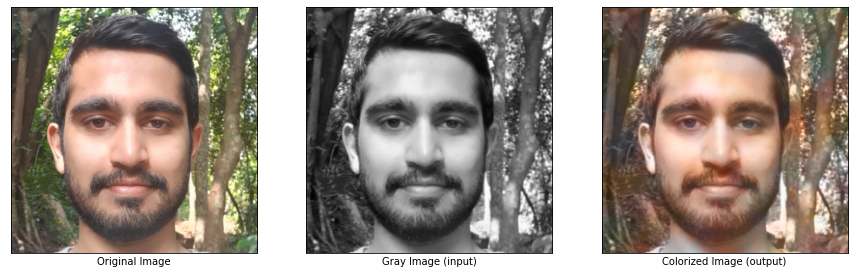

In [5]:
original_img = io.imread("me.jpg")
MakePlot(original_img)

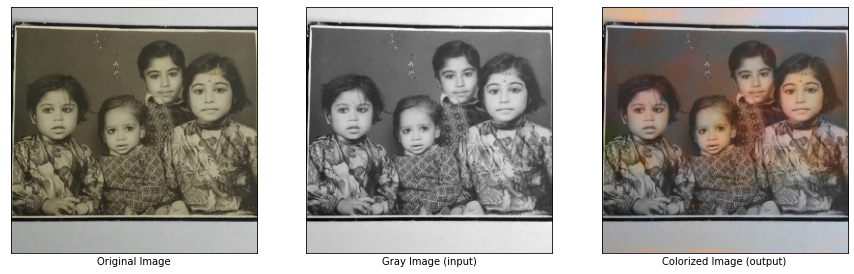

In [6]:
original_img = io.imread("mom-fam.jpeg")
MakePlot(original_img)

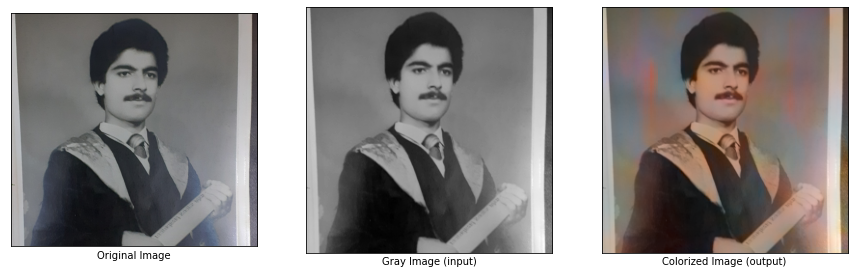

In [7]:
original_img = io.imread("dad.jpg")
MakePlot(original_img)